In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
data=pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
           header=None,na_values="?")
data.columns=("mpg","cyl","displ","hp","weight","accel","model","origin","carname")
data = data.dropna(axis=0)
data[:3]

,mpg,cyl,displ,hp,weight,accel,model,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""


In [3]:
cardata=np.array(data[["cyl","mpg","accel"]])
cardata[:3]

array([[ 8. , 18. , 12. ],
       [ 8. , 15. , 11.5],
       [ 8. , 18. , 11. ]])

In [4]:
cars=np.array([line for line in cardata if line[0] in [4,6,8]])
len(cars),len(cardata)

(385, 392)

In [5]:
Y=cars[:,0]/2-2
X=cars[:,1:]

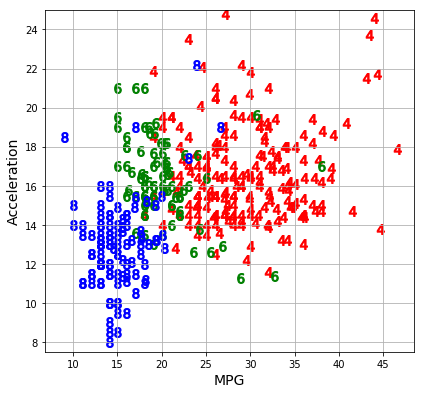

In [6]:
colors=["red", "green","blue"]
markers=["$4$","$6$","$8$"]
nclasses=3
for i in range(nclasses):
    x,y=zip(*X[Y==i])
    plt.scatter(x,y,marker=markers[i],color=colors[i],s=100)

plt.xlabel("MPG",fontsize=14)
plt.ylabel("Acceleration",fontsize=14)
plt.ylim([7.5,25])
plt.grid()
fig=plt.gcf()
fig.tight_layout()
fig.set_size_inches(6,6)

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [8]:
gnb=GaussianNB()

In [9]:
XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y,test_size=.25)

In [10]:
gnb.fit(XTRAIN,YTRAIN)

GaussianNB(priors=None)

In [11]:
YP=gnb.predict(XTEST)

In [12]:
print(confusion_matrix(YTEST,YP))
print("accuracy = ",accuracy_score(YTEST,YP))

[[40  6  0]
 [ 6 11  0]
 [ 1  2 31]]
accuracy =  0.845360824742268


In [17]:
def visualize_clasifier_contours(clf,X,Y,DX,DY,thelevels,colors,markers,xlab="X",
                                ylab="Y", filename='classifier-figure.pdf'):
    xinterval = X[:, 0].min() - 1, X[:, 0].max() + 1
    yinterval = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(*xinterval, DX),
                         np.arange(*yinterval, DY))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    c=plt.contour(xx, yy, Z, alpha=1,levels=thelevels,linewidths=2,colors="k")
    c=plt.contourf(xx, yy, Z, alpha=.1)

  
    nclasses=len(colors)
    for i in range(nclasses):
        x,y=zip(*X[Y==i])
        plt.scatter(x,y,marker=markers[i],color=colors[i],s=100)


    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.grid()
    fig=plt.gcf()
    fig.tight_layout()
    fig.set_size_inches(6,6)
    fig.savefig(filename)

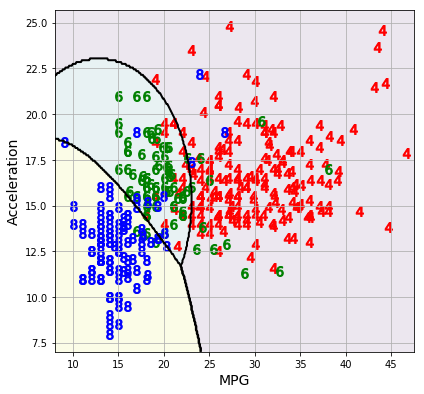

In [16]:
colors=["red", "green","blue"]
markers=["$4$","$6$","$8$"]
visualize_clasifier_contours(gnb,X,Y,.1,.1, [0.5,1.5],colors,markers,"MPG","Acceleration")